## Data Usage Example Notebook
This notebook will walk through examples of how to work with both the summary and raw calendar aging data present in this dataset

In [6]:
#general imports
import matplotlib.pyplot as plt
import sys
import pandas as pd

In [7]:
#This is the directory where the structuring code is located. Add this to the current working directory
structuring_code_path = "../structuring_code/"
sys.path.insert(0, structuring_code_path)

#Now we can load in important functions to load the summary and raw data
from Joule_raw_data_builder import load_raw_obj
from Joule_sum_data_builder import load_sum_obj

In [8]:
#This is the cell id summary csv
joule_cell_id_path =  "../Joule_cell_id.csv"
joule_cell_id_df = pd.read_csv(joule_cell_id_path)
joule_cell_id_df.head()

,Cell_type,Cell_chemistry,Form_factor,Approximate Recording Frequency,Test_id,SOC,Temperature,Cell_id,Lot,Comment
0,Panasonic NCR18650GA,NCA,18650,bi-annual,T0000001,50,24,C00001,L001,NaN
1,Panasonic NCR18650GA,NCA,18650,bi-annual,T0000001,50,24,C00002,L001,NaN
2,Panasonic NCR18650GA,NCA,18650,bi-annual,T0000001,50,24,C00003,L001,NaN
3,Panasonic NCR18650GA,NCA,18650,bi-annual,T0000001,50,24,C00004,L001,NaN
4,Panasonic NCR18650GA,NCA,18650,bi-annual,T0000001,50,24,C00005,L001,NaN


## Plotting/Using Raw Data

In [12]:
#This is the path to the raw data
raw_path = "../joule_declass_raw/"
#choose a cell id
cell_id = "C00001"
#All filenames are of this form
raw_filename = "{}_raw.json".format(cell_id)
#Load raw obj in 
raw_obj = load_raw_obj(raw_path+raw_filename)

In [14]:
#Comment that is present in Joule_cell_id file
raw_obj.comment

nan

In [16]:
#Meta data containing the start date of a diagnostic, what cycler it was run on, and on what channel number
raw_obj.meta_data

{'M00': {'DateTime': '2016-01-08', 'ChannelNumber': '47', 'Cycler': 'D1'},
 'M06': {'DateTime': '2016-07-11', 'ChannelNumber': '48', 'Cycler': 'D1'},
 'M12': {'DateTime': '2017-01-20', 'ChannelNumber': '47', 'Cycler': 'D1'},
 'M18': {'DateTime': '2017-07-24', 'ChannelNumber': '13', 'Cycler': 'D1'},
 'M24': {'DateTime': '2018-01-26', 'ChannelNumber': '32', 'Cycler': 'D1'},
 'M30': {'DateTime': '2018-07-31', 'ChannelNumber': '37', 'Cycler': 'D1'},
 'M36': {'DateTime': '2019-02-05', 'ChannelNumber': '37', 'Cycler': 'D1'},
 'M42': {'DateTime': '2019-08-08', 'ChannelNumber': '43', 'Cycler': 'D1'},
 'M48': {'DateTime': '2020-02-11', 'ChannelNumber': '43', 'Cycler': 'D1'},
 'M57': {'DateTime': '2020-11-20', 'ChannelNumber': '37', 'Cycler': 'D1'},
 'M63': {'DateTime': '2021-05-24', 'ChannelNumber': '43', 'Cycler': 'D1'},
 'M69': {'DateTime': '2021-11-29', 'ChannelNumber': '38', 'Cycler': 'D1'}}

In [17]:
#raw data containing voltage, current, capacity, etc data
raw_obj.raw_data

,Rec,Cycle,Step,Test Time (s),Step Time (s),Capacity (Ah),Energy (Wh),Current (A),Voltage (V),MD,ES,DPT Time,diag_num,Diag_Start_Datetime
0,1,0,2,1.010002,0.010001,0.00000,0.00000,0.000000,3.74899,R,0,01/08/2016 4:51:41 PM,0,2016-01-08
1,2,0,2,61.009999,60.009998,0.00000,0.00000,0.000000,3.74899,R,1,01/08/2016 4:52:41 PM,0,2016-01-08
2,3,0,2,121.000000,119.999999,0.00000,0.00000,0.000000,3.74884,R,129,01/08/2016 4:53:41 PM,0,2016-01-08
3,4,0,3,121.020001,0.020002,0.00000,0.00001,0.701533,3.71832,D,0,01/08/2016 4:53:41 PM,0,2016-01-08
4,5,0,3,301.020001,180.020002,0.03500,0.12925,0.700008,3.68276,D,1,01/08/2016 4:56:41 PM,0,2016-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16189,"1,322",8,27,253338.959999,8243.470001,1.60284,5.81258,0.699931,3.86709,C,1,12/02/2021 10:45:23 AM,11,2021-11-29
16190,"1,323",8,27,253638.960001,8543.470000,1.66118,6.03870,0.699931,3.88556,C,1,12/02/2021 10:50:23 AM,11,2021-11-29
16191,"1,324",8,27,253938.960000,8843.469998,1.71951,6.26586,0.700008,3.90234,C,1,12/02/2021 10:55:23 AM,11,2021-11-29
16192,"1,325",8,27,254095.490002,9000.000000,1.74994,6.38475,0.699855,3.91058,C,129,12/02/2021 10:58:00 AM,11,2021-11-29


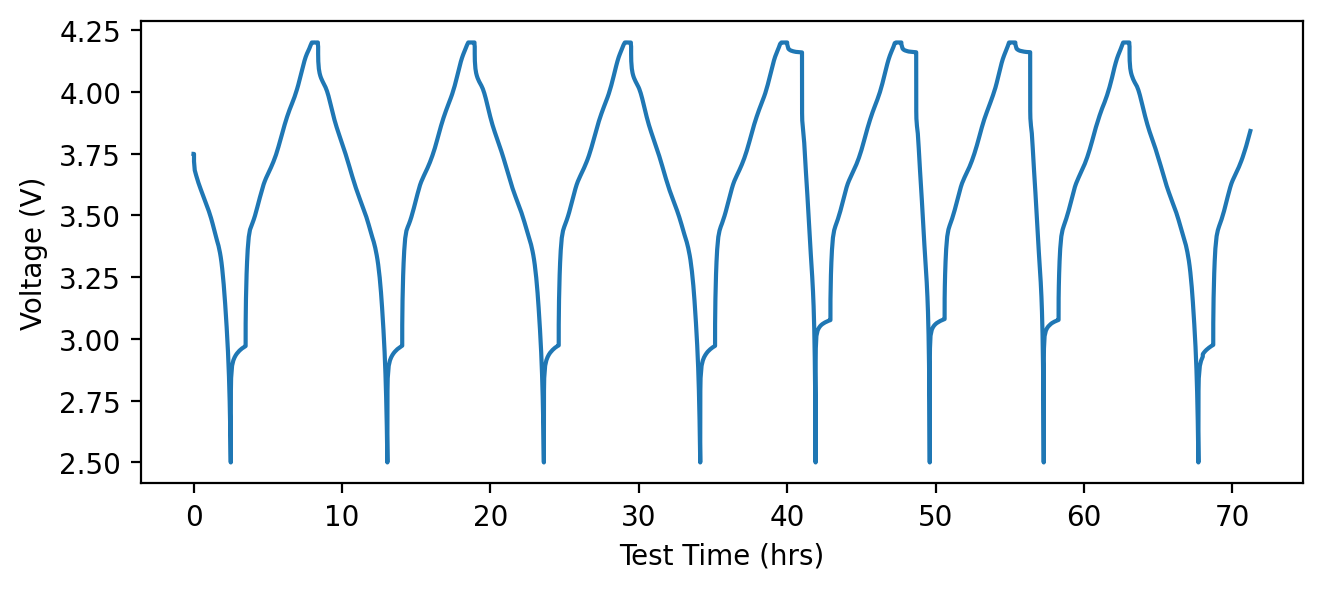

In [21]:
# let's plot the first diagnostic cycle
df_first_diag = raw_obj.raw_data[raw_obj.raw_data["diag_num"]==0]

plt.figure(figsize=(7.5, 3), dpi=200)
plt.plot(df_first_diag["Test Time (s)"]/3600, df_first_diag["Voltage (V)"])
plt.ylabel("Voltage (V)")
plt.xlabel("Test Time (hrs)")
plt.show()


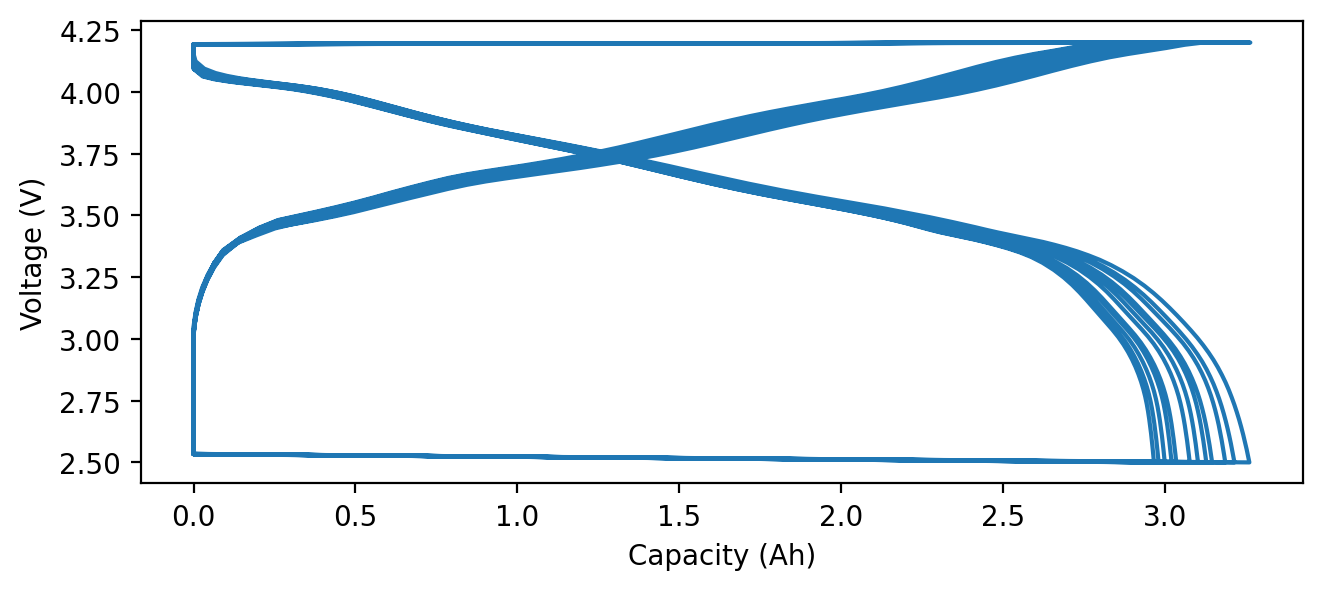

In [23]:
# let's plot V vs Q across diagnostic cycles for a given portion of the diagnostic cycle ()
df_filter = (raw_obj.raw_data["Cycle"]==3)
df_first_diag = raw_obj.raw_data[df_filter]

plt.figure(figsize=(7.5, 3), dpi=200)
plt.plot(df_first_diag["Capacity (Ah)"], df_first_diag["Voltage (V)"])
plt.ylabel("Voltage (V)")
plt.xlabel("Capacity (Ah)")
plt.show()


## Plotting/Using Summary Data

In [25]:
#This is the path to the raw data
sum_path = "../joule_declass_sum/"
#choose a cell id
cell_id = "C00001"
#All filenames are of this form
sum_filename = "{}_sum.json".format(cell_id)
#Load raw obj in 
sum_obj = load_sum_obj(sum_path+sum_filename)

In [29]:
#Comment and meta data are the same as the raw data
display(sum_obj.comment)
display(sum_obj.meta_data)

nan

{'M00': {'DateTime': '2016-01-08', 'ChannelNumber': '47', 'Cycler': 'D1'},
 'M06': {'DateTime': '2016-07-11', 'ChannelNumber': '48', 'Cycler': 'D1'},
 'M12': {'DateTime': '2017-01-20', 'ChannelNumber': '47', 'Cycler': 'D1'},
 'M18': {'DateTime': '2017-07-24', 'ChannelNumber': '13', 'Cycler': 'D1'},
 'M24': {'DateTime': '2018-01-26', 'ChannelNumber': '32', 'Cycler': 'D1'},
 'M30': {'DateTime': '2018-07-31', 'ChannelNumber': '37', 'Cycler': 'D1'},
 'M36': {'DateTime': '2019-02-05', 'ChannelNumber': '37', 'Cycler': 'D1'},
 'M42': {'DateTime': '2019-08-08', 'ChannelNumber': '43', 'Cycler': 'D1'},
 'M48': {'DateTime': '2020-02-11', 'ChannelNumber': '43', 'Cycler': 'D1'},
 'M57': {'DateTime': '2020-11-20', 'ChannelNumber': '37', 'Cycler': 'D1'},
 'M63': {'DateTime': '2021-05-24', 'ChannelNumber': '43', 'Cycler': 'D1'},
 'M69': {'DateTime': '2021-11-29', 'ChannelNumber': '38', 'Cycler': 'D1'}}

In [30]:
#Summary data has several metrics of interest
sum_obj.summary_data

,RPT0.2C_0_C_capacity,RPT0.2C_0_C_CV_capacity,RPT0.2C_0_D_capacity,RPT0.2C_1_C_capacity,RPT0.2C_1_C_CV_capacity,RPT0.2C_1_D_capacity,RPT0.2C_2_C_capacity,RPT0.2C_2_C_CV_capacity,RPT0.2C_2_D_capacity,RPT_HighC_0_C_capacity,...,RPT_HighC_1_D_energy,RPT_HighC_2_C_energy,RPT_HighC_5_C_CV_energy,RPT_HighC_2_D_energy,diag_num,Calendar_Time(date),Res_SS_0_D,Res_SS_1_D,Res_SS_2_D,Calendar_DateTime(days)
0,3.06490,3.27140,3.26567,3.05664,3.26673,3.26142,3.06073,3.26281,3.25981,3.06960,...,11.05830,11.28116,12.20614,11.06555,0,2016-01-08,0.216114,0.215845,0.213771,0
1,3.00135,3.21916,3.21371,3.00515,3.21752,3.21689,2.99951,3.21597,3.21361,3.00904,...,10.92491,11.32018,12.05216,10.90556,1,2016-07-11,0.216050,0.217387,0.218215,185
2,2.99260,3.19437,3.18884,2.99356,3.19004,3.18806,2.99326,3.18867,3.18541,3.00652,...,10.87265,11.28019,11.97185,10.85905,2,2017-01-20,0.217333,0.217432,0.218660,378
3,2.93640,3.15325,3.15175,2.99699,3.15760,3.15084,2.94458,3.14501,3.14480,2.95125,...,10.69672,11.09099,11.82343,10.69601,3,2017-07-24,0.227568,0.230571,0.226133,563
4,2.93380,3.13010,3.12949,2.94029,3.13000,3.12945,2.94295,3.12654,3.12676,2.94109,...,10.65683,10.85057,11.76500,10.64548,4,2018-01-26,0.227306,0.228109,0.226966,749
5,2.88183,3.10639,3.10582,2.88501,3.10586,3.10364,2.88481,3.10149,3.10127,2.88487,...,10.57019,10.87356,11.67963,10.55978,5,2018-07-31,0.231493,0.230497,0.230807,935
6,2.88112,3.07767,3.07412,2.88712,3.07816,3.07594,2.88673,3.07767,3.07564,2.88650,...,10.46932,10.64401,11.59373,10.47135,6,2019-02-05,0.233090,0.234371,0.233381,1124
7,2.82240,3.03598,3.03451,2.82903,3.03901,3.03737,2.82646,3.03468,3.03410,2.82832,...,10.35401,10.62470,11.47130,10.34340,7,2019-08-08,0.233748,0.235947,0.235460,1308
8,2.82392,3.01904,3.01811,2.82849,3.02075,3.01967,2.82724,3.02058,3.01964,2.82704,...,10.29227,10.62947,11.41638,10.30237,8,2020-02-11,0.233552,0.238221,0.235436,1495
9,2.76867,2.99873,2.99845,2.77105,3.00111,3.00036,2.77023,2.99905,2.99850,2.76896,...,10.21205,10.42422,11.32989,10.20665,9,2020-11-20,0.240120,0.242087,0.241842,1778


In [31]:
#These are all the computed features for each diagnostic cycle
#For further information on the calculation of these features see the Joule_sum_data_builder module.
#Information on what the names of these features correspond to is present on the online repository as well.
sum_obj.summary_data.columns

Index(['RPT0.2C_0_C_capacity', 'RPT0.2C_0_C_CV_capacity',
       'RPT0.2C_0_D_capacity', 'RPT0.2C_1_C_capacity',
       'RPT0.2C_1_C_CV_capacity', 'RPT0.2C_1_D_capacity',
       'RPT0.2C_2_C_capacity', 'RPT0.2C_2_C_CV_capacity',
       'RPT0.2C_2_D_capacity', 'RPT_HighC_0_C_capacity',
       'RPT_HighC_3_C_CV_capacity', 'RPT_HighC_0_D_capacity',
       'RPT_HighC_1_C_capacity', 'RPT_HighC_4_C_CV_capacity',
       'RPT_HighC_1_D_capacity', 'RPT_HighC_2_C_capacity',
       'RPT_HighC_5_C_CV_capacity', 'RPT_HighC_2_D_capacity',
       'RPT0.2C_0_C_energy', 'RPT0.2C_0_C_CV_energy', 'RPT0.2C_0_D_energy',
       'RPT0.2C_1_C_energy', 'RPT0.2C_1_C_CV_energy', 'RPT0.2C_1_D_energy',
       'RPT0.2C_2_C_energy', 'RPT0.2C_2_C_CV_energy', 'RPT0.2C_2_D_energy',
       'RPT_HighC_0_C_energy', 'RPT_HighC_3_C_CV_energy',
       'RPT_HighC_0_D_energy', 'RPT_HighC_1_C_energy',
       'RPT_HighC_4_C_CV_energy', 'RPT_HighC_1_D_energy',
       'RPT_HighC_2_C_energy', 'RPT_HighC_5_C_CV_energy',
       'RPT_

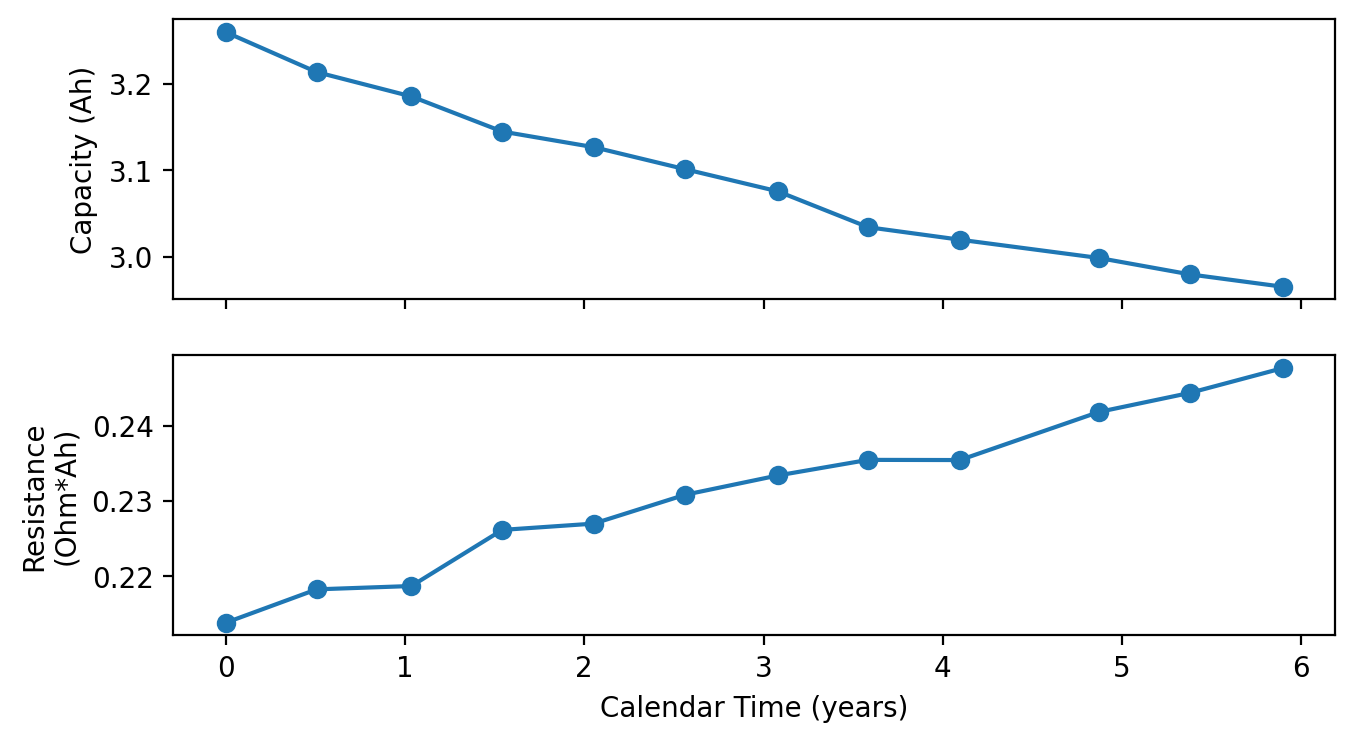

In [45]:
#Common features plotted in the paper are the 3rd low-rate rpt discharge capacity
#and the steady state resistance increase between the 3rd low-rate rpt and 3rd high
#rate rpt.

fig, axs = plt.subplots(2,1, figsize=(7.5, 4), sharex=True, dpi=200)
cap_metric = "RPT0.2C_2_D_capacity"
res_metric = "Res_SS_2_D"

axs[0].plot(sum_obj.summary_data["Calendar_DateTime(days)"]/365, sum_obj.summary_data["RPT0.2C_2_D_capacity"], "-o")
axs[0].set_ylabel("Capacity (Ah)")

axs[1].plot(sum_obj.summary_data["Calendar_DateTime(days)"]/365, sum_obj.summary_data[res_metric], "-o")
axs[1].set_ylabel(r"Resistance" "\n" "(Ohm*Ah)")
axs[1].set_xlabel("Calendar Time (years)")
plt.show()

## Using Df to plot together

In [49]:
#The Joule cell id df can help us identify the cell ids of cells of interest and plot them together
#i.e. say we want to plot all the Panasonic NCR18650GA, 50% soc, 24C cells.
temp = 24
soc = 50
cell_type = "Panasonic NCR18650GA"
df_filter = (joule_cell_id_df["Cell_type"]==cell_type) & (joule_cell_id_df["Temperature"]==temp) & (joule_cell_id_df["SOC"]==soc)

cell_id_to_plot = joule_cell_id_df[df_filter]["Cell_id"]
display(joule_cell_id_df[df_filter])

,Cell_type,Cell_chemistry,Form_factor,Approximate Recording Frequency,Test_id,SOC,Temperature,Cell_id,Lot,Comment
0,Panasonic NCR18650GA,NCA,18650,bi-annual,T0000001,50,24,C00001,L001,NaN
1,Panasonic NCR18650GA,NCA,18650,bi-annual,T0000001,50,24,C00002,L001,NaN
2,Panasonic NCR18650GA,NCA,18650,bi-annual,T0000001,50,24,C00003,L001,NaN
3,Panasonic NCR18650GA,NCA,18650,bi-annual,T0000001,50,24,C00004,L001,NaN
4,Panasonic NCR18650GA,NCA,18650,bi-annual,T0000001,50,24,C00005,L001,NaN
5,Panasonic NCR18650GA,NCA,18650,bi-annual,T0000001,50,24,C00006,L001,NaN


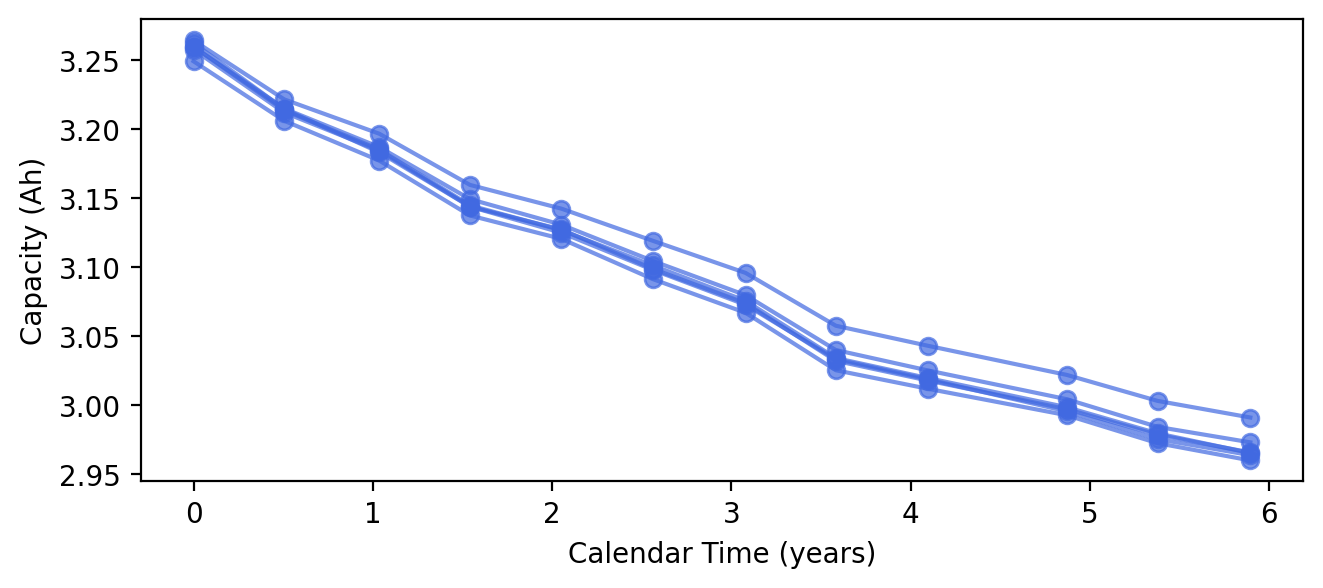

In [54]:
#Plot these cells together
cap_metric = "RPT0.2C_2_D_capacity"

plt.figure(figsize=(7.5, 3), dpi=200)
for cell_id in cell_id_to_plot:
    #load data
    sum_filename = "{}_sum.json".format(cell_id) 
    sum_obj = load_sum_obj(sum_path+sum_filename)

    #plot metric of interest
    plt.plot(sum_obj.summary_data["Calendar_DateTime(days)"]/365, sum_obj.summary_data["RPT0.2C_2_D_capacity"], "-o", color="royalblue", alpha=0.7)

plt.ylabel("Capacity (Ah)")
plt.xlabel("Calendar Time (years)")
plt.show()